In [269]:
import pandas as pd
import matplotlib
import numpy

df = pd.read_csv("full_stats.csv")

Clean the data set
- add empty values

In [270]:
# fix na's
df['seed'] = df['seed'].fillna(1000)
df['round_exit'] = df['round_exit'].fillna(1000)
df['eleven_or_better'] = df['eleven_or_better'].fillna("No")
df['sweet_sixteen'] = df['sweet_sixteen'].fillna("No")


df.to_csv('new_full_stats.csv', index=False)
df

,id,team,season,seed,round_exit,eleven_or_better,sweet_sixteen,kenpom_rank,conference,games,...,def_close_%,def_close_share,off_long2_%,off_long2_share,def_long2_%,def_long2_share,off_three_%,off_three_share,def_three_%,def_three_share
0,1,Abilene Christian,2023-2024,1000.0,1000.0,No,No,207,WAC,34,...,60.5,45.1,34.6,29.0,38.4,23.3,34.1,26.4,32.5,31.6
1,2,Abilene Christian,2022-2023,1000.0,1000.0,No,No,193,WAC,30,...,67.5,39.8,33.5,25.0,39.3,26.6,34.3,33.4,38.1,33.6
2,3,Abilene Christian,2021-2022,1000.0,1000.0,No,No,131,WAC,36,...,63.3,33.6,37.1,24.6,37.6,26.3,32.2,36.3,34.6,40.0
3,4,Abilene Christian,2020-2021,14.0,32.0,No,No,84,Slnd,29,...,56.0,35.1,34.4,21.2,36.2,30.5,36.4,36.0,29.8,34.4
4,5,Air Force,2023-2024,1000.0,1000.0,No,No,264,MWC,31,...,60.0,44.9,33.3,16.7,38.7,18.4,36.1,47.2,36.6,36.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,Yale,2021-2022,14.0,64.0,No,No,147,Ivy,31,...,60.8,34.5,41.9,27.2,37.4,24.3,32.6,36.0,30.5,41.2
1426,1427,Youngstown St.,2023-2024,1000.0,1000.0,No,No,134,Horz,32,...,57.5,32.3,42.3,27.4,38.2,32.1,31.9,42.2,34.0,35.7
1427,1428,Youngstown St.,2022-2023,1000.0,1000.0,No,No,131,Horz,34,...,62.9,35.8,38.3,26.7,37.9,30.7,36.2,35.0,34.1,33.5
1428,1429,Youngstown St.,2021-2022,1000.0,1000.0,No,No,254,Horz,34,...,63.4,32.4,44.0,27.6,37.7,31.7,34.1,38.6,34.3,35.8


Change some columns to numbers

In [271]:
df.columns
df['eleven_or_better'].value_counts()

eleven_or_better
No     1247
Yes     183
Name: count, dtype: int64

In [272]:
df['eleven_or_better'] = df['eleven_or_better'].apply(lambda x: 1 if x == "Yes" else 0)
df['sweet_sixteen'] = df['sweet_sixteen'].apply(lambda x: 1 if x == "Yes" else 0)
df['sweet_sixteen'].value_counts()

sweet_sixteen
0    1366
1      64
Name: count, dtype: int64

Check Correlations

In [273]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,seed,round_exit,eleven_or_better,sweet_sixteen,kenpom_rank,games,wins,losses,net_rtg,...,def_close_%,def_close_share,off_long2_%,off_long2_share,def_long2_%,def_long2_share,off_three_%,off_three_share,def_three_%,def_three_share
id,1.000000,0.012302,0.013230,-0.022127,-0.044897,-0.111857,0.029172,0.075901,-0.068174,0.095607,...,-0.029642,-0.044890,0.004146,0.007050,-0.030900,0.013663,0.050772,-0.041458,-0.025605,0.031960
seed,0.012302,1.000000,0.999711,-0.792992,-0.448826,0.553249,-0.262519,-0.566687,0.467044,-0.594988,...,0.171069,0.210558,-0.114475,-0.005102,0.253442,-0.236092,-0.251645,0.035661,0.293679,0.026828
round_exit,0.013230,0.999711,1.000000,-0.797074,-0.465766,0.555437,-0.265139,-0.569143,0.467677,-0.598465,...,0.171264,0.211060,-0.114104,-0.005108,0.254155,-0.237369,-0.252902,0.035564,0.294736,0.027611
eleven_or_better,-0.022127,-0.792992,-0.797074,1.000000,0.524534,-0.566744,0.236704,0.478935,-0.380804,0.632376,...,-0.133609,-0.223928,0.061367,0.039440,-0.268495,0.256387,0.203036,-0.035526,-0.251313,-0.033985
sweet_sixteen,-0.044897,-0.448826,-0.465766,0.524534,1.000000,-0.337724,0.207736,0.366343,-0.266255,0.414860,...,-0.112106,-0.141691,0.050973,-0.000330,-0.158596,0.170395,0.161741,-0.009453,-0.187267,-0.029337
kenpom_rank,-0.111857,0.553249,0.555437,-0.566744,-0.337724,1.000000,-0.302136,-0.746968,0.656805,-0.982320,...,0.264502,0.337242,-0.152376,0.112004,0.420888,-0.350888,-0.385504,-0.062459,0.430151,0.015221
games,0.029172,-0.262519,-0.265139,0.236704,0.207736,-0.302136,1.000000,0.620083,0.157543,0.325693,...,-0.117729,-0.078403,0.138018,-0.065381,-0.062664,0.069278,0.166972,0.009832,-0.117631,0.009131
wins,0.075901,-0.566687,-0.569143,0.478935,0.366343,-0.746968,0.620083,1.000000,-0.677049,0.763010,...,-0.342053,-0.246951,0.247504,-0.179648,-0.312007,0.277827,0.424556,0.046507,-0.436310,-0.032164
losses,-0.068174,0.467044,0.467677,-0.380804,-0.266255,0.656805,0.157543,-0.677049,1.000000,-0.654899,...,0.320113,0.237296,-0.182070,0.164796,0.333948,-0.284720,-0.377769,-0.049316,0.438848,0.049051
net_rtg,0.095607,-0.594988,-0.598465,0.632376,0.414860,-0.982320,0.325693,0.763010,-0.654899,1.000000,...,-0.275155,-0.337289,0.156158,-0.105133,-0.427686,0.358358,0.392462,0.050498,-0.433710,-0.022706


<Axes: xlabel='off_close_share', ylabel='sweet_sixteen'>

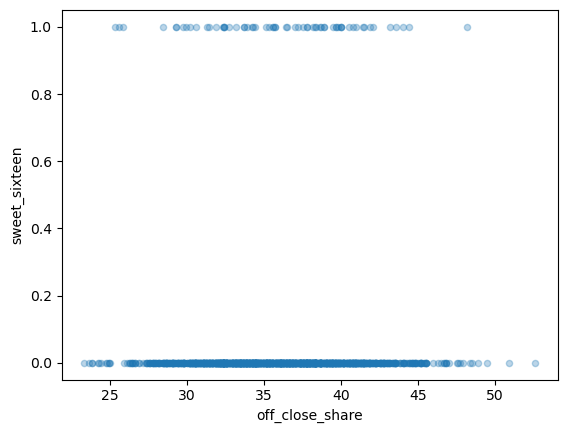

In [274]:
df.plot.scatter("off_close_share", "sweet_sixteen", alpha=.3)

willards csvs

In [275]:
adv = pd.read_csv("willard_adv.csv")
pg = pd.read_csv("willard_pg.csv")

adv.columns

Index(['Id', 'Season', 'Team', 'W/L%', 'Tourney?', 'G', 'W', 'L', 'Pace',
       'ORtg', 'DRtg', 'eFG%', 'TS%', 'TOV%', 'ORB%', 'DRB%', 'FTr',
       'opp_eFG%', 'opp_TS%', 'opp_TOV%', 'opp_ORB%', 'opp_DRB%', 'opp_FTr'],
      dtype='object')

In [276]:
pg.columns

Index(['Id', 'Season', 'Team', 'G', 'W', 'L', 'W/L%', 'Min/G', 'FG/G', 'FGA/G',
       '2P/G', '2PA/G', '3P/G', '3PA/G', 'FT/G', 'FTA/G', 'ORB/G', 'DRB/G',
       'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PF/G', 'PTS/G',
       'opp_FG/G', 'opp_FGA/G', 'opp_2P/G', 'opp_2PA/G', 'opp_3P/G',
       'opp_3PA/G', 'opp_FT/G', 'opp_FTA/G', 'opp_ORB/G', 'opp_DRB/G',
       'opp_TRB/G', 'opp_AST/G', 'opp_STL/G', 'opp_BLK/G', 'opp_TOV/G',
       'opp_PF/G', 'opp_PTS/G'],
      dtype='object')

In [277]:

pg = pg.drop('G', axis=1)
pg = pg.drop('W', axis=1)
pg = pg.drop('L', axis=1)
pg = pg.drop('W/L%', axis=1)

pg.columns


Index(['Id', 'Season', 'Team', 'Min/G', 'FG/G', 'FGA/G', '2P/G', '2PA/G',
       '3P/G', '3PA/G', 'FT/G', 'FTA/G', 'ORB/G', 'DRB/G', 'TRB/G', 'AST/G',
       'STL/G', 'BLK/G', 'TOV/G', 'PF/G', 'PTS/G', 'opp_FG/G', 'opp_FGA/G',
       'opp_2P/G', 'opp_2PA/G', 'opp_3P/G', 'opp_3PA/G', 'opp_FT/G',
       'opp_FTA/G', 'opp_ORB/G', 'opp_DRB/G', 'opp_TRB/G', 'opp_AST/G',
       'opp_STL/G', 'opp_BLK/G', 'opp_TOV/G', 'opp_PF/G', 'opp_PTS/G'],
      dtype='object')

In [278]:
# join csvs
merged_df = pd.merge(adv, pg, on=['Id', 'Season', 'Team'], how='outer')

# fix extras and rename
# merged_df = merged_df.drop('G_y', axis=1)
# merged_df = merged_df.drop('W_y', axis=1)
# merged_df = merged_df.drop('L_y', axis=1)
# merged_df = merged_df.drop('W/L%_y', axis=1)



merged_df.columns




Index(['Id', 'Season', 'Team', 'W/L%', 'Tourney?', 'G', 'W', 'L', 'Pace',
       'ORtg', 'DRtg', 'eFG%', 'TS%', 'TOV%', 'ORB%', 'DRB%', 'FTr',
       'opp_eFG%', 'opp_TS%', 'opp_TOV%', 'opp_ORB%', 'opp_DRB%', 'opp_FTr',
       'Min/G', 'FG/G', 'FGA/G', '2P/G', '2PA/G', '3P/G', '3PA/G', 'FT/G',
       'FTA/G', 'ORB/G', 'DRB/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'TOV/G',
       'PF/G', 'PTS/G', 'opp_FG/G', 'opp_FGA/G', 'opp_2P/G', 'opp_2PA/G',
       'opp_3P/G', 'opp_3PA/G', 'opp_FT/G', 'opp_FTA/G', 'opp_ORB/G',
       'opp_DRB/G', 'opp_TRB/G', 'opp_AST/G', 'opp_STL/G', 'opp_BLK/G',
       'opp_TOV/G', 'opp_PF/G', 'opp_PTS/G'],
      dtype='object')

In [279]:
merged_num = merged_df.select_dtypes(include=['number'])

merged_num.corr()

,Id,W/L%,Tourney?,G,W,L,Pace,ORtg,DRtg,eFG%,...,opp_FTA/G,opp_ORB/G,opp_DRB/G,opp_TRB/G,opp_AST/G,opp_STL/G,opp_BLK/G,opp_TOV/G,opp_PF/G,opp_PTS/G
Id,1.000000,-0.169054,-0.494872,0.015229,-0.144976,0.177122,-0.161887,-0.561188,-0.229773,-0.016931,...,0.816214,0.394239,-0.057461,0.198806,0.121708,0.421664,0.574221,0.540268,-0.066064,-0.254599
W/L%,-0.169054,1.000000,0.709973,0.184107,0.941228,-0.956325,0.493547,0.443322,-0.354984,0.301291,...,-0.171043,0.078948,-0.005265,0.049384,-0.219841,-0.068929,0.002862,0.247824,0.297909,0.028156
Tourney?,-0.494872,0.709973,1.000000,0.342898,0.745471,-0.622591,0.642679,0.625889,0.017470,0.331858,...,-0.442000,-0.169276,0.079035,-0.063496,0.069153,-0.219674,-0.303205,-0.209490,0.262507,0.398948
G,0.015229,0.184107,0.342898,1.000000,0.502271,0.106623,-0.108736,0.356969,0.116724,0.270361,...,0.027965,-0.365167,-0.359597,-0.477514,0.100498,-0.264079,0.151339,-0.231509,0.348532,0.017445
W,-0.144976,0.941228,0.745471,0.502271,1.000000,-0.806227,0.403451,0.515769,-0.268087,0.349005,...,-0.156505,-0.056735,-0.126489,-0.119389,-0.147040,-0.156709,0.058567,0.135378,0.392732,0.038971
L,0.177122,-0.956325,-0.622591,0.106623,-0.806227,1.000000,-0.538308,-0.348838,0.388122,-0.216336,...,0.199092,-0.184598,-0.100579,-0.189418,0.237834,-0.000481,0.036197,-0.314057,-0.213135,-0.032875
Pace,-0.161887,0.493547,0.642679,-0.108736,0.403451,-0.538308,1.000000,0.337244,-0.013048,0.151009,...,-0.110232,0.210570,0.533061,0.469497,0.262785,-0.028279,-0.123967,0.185364,0.289585,0.637914
ORtg,-0.561188,0.443322,0.625889,0.356969,0.515769,-0.348838,0.337244,1.000000,0.523048,0.633739,...,-0.502473,-0.511408,-0.281590,-0.501555,0.192772,-0.531598,-0.523959,-0.531483,0.488710,0.598964
DRtg,-0.229773,-0.354984,0.017470,0.116724,-0.268087,0.388122,-0.013048,0.523048,1.000000,0.472207,...,-0.125019,-0.480053,-0.354249,-0.537146,0.672822,-0.142297,-0.486599,-0.693638,0.335177,0.757761
eFG%,-0.016931,0.301291,0.331858,0.270361,0.349005,-0.216336,0.151009,0.633739,0.472207,1.000000,...,-0.070861,-0.232908,-0.611458,-0.549198,0.310403,0.014211,-0.447900,-0.241215,0.268538,0.438419


In [280]:
df.columns

Index(['id', 'team', 'season', 'seed', 'round_exit', 'eleven_or_better',
       'sweet_sixteen', 'kenpom_rank', 'conference', 'games', 'wins', 'losses',
       'net_rtg', 'off_rtg', 'off_rtg_rank', 'def_rtg_rank', 'def_rtg_rank.1',
       'adj_tempo', 'adj_tempo_rank', 'luck', 'luck_rank', 'sos_net_rtg',
       'sos_net_rtg_rank', 'sos_ORtg', 'sos_ORtg_rank', 'sos_DRtg',
       'sos_DRtg_rank', 'ncsos_NetRtg', 'ncsos_NetRtg_rank', 'off_dunk_%',
       'off_dunk_share', 'def_dunk_%', 'def_dunk_share', 'off_close_%',
       'off_close_share', 'def_close_%', 'def_close_share', 'off_long2_%',
       'off_long2_share', 'def_long2_%', 'def_long2_share', 'off_three_%',
       'off_three_share', 'def_three_%', 'def_three_share'],
      dtype='object')

In [281]:
df['adj_tempo'].mean()


67.51846153846155

In [282]:
df[df['sweet_sixteen'] == 1]['adj_tempo'].mean()

67.79843749999999